<a href="https://colab.research.google.com/github/DataScienceUB/DeepLearningMaster2019/blob/master/Assignment%201.%20Pixel%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Pixel Regression.

Can we recover an image by learning a deep regression map from pixels to colors?: $f: (x,y) \to (r,g,b)$.

Our target image will be Mona Lisa:

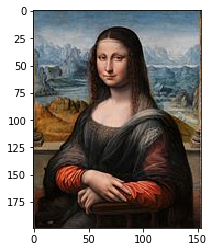

(199, 153, 4)

In [1]:
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline

im = mpimg.imread("https://raw.githubusercontent.com/DataScienceUB/DeepLearningMaster2019/master/data/monalisa.png")

plt.imshow(im)
plt.show()
im.shape

Ourt training dataset will be composed of pixels locations and input and pixel values as output:

In [20]:
X_train = []
Y_train = []
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        X_train.append([float(i),float(j)])
        Y_train.append(im[i][j][:3])
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
print('Samples:', X_train.shape[0])
print('(x,y):', X_train[1230],'->', '(r,g,b):',Y_train[0])

[0.33333334 0.40784314 0.4627451 ]
Samples: 30447
(x,y): [8. 6.] -> (r,g,b): [0.33333334 0.40784314 0.4627451 ]


Our objective is to train a deep Multilayer Perceptron (MLP) that is able to generate an approximate image, at least as this one:

![alt text](https://github.com/DataScienceUB/DeepLearningMaster2019/blob/master/images/result.png?raw=1)


In [8]:
import tensorflow.keras as keras
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils


# your model here
# hints: k*10^2 neurons per layer + good initialization + deep network (>2 layers)

model = Sequential()
model.add(Dense(100, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('sigmoid'))

model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='mean_squared_error',
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               300       
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_8 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
__________

Epoch 1/1000
  340/30447 [..............................] - ETA: 14s - loss: 0.0136 - acc: 0.8882

/home/nuria/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


30447/30447 [==============================] - 11s 373us/step - loss: 0.0135 - acc: 0.8810
Epoch 2/1000
30447/30447 [==============================] - 11s 357us/step - loss: 0.0132 - acc: 0.8864
Epoch 3/1000
30447/30447 [==============================] - 11s 354us/step - loss: 0.0127 - acc: 0.8911
Epoch 4/1000
30447/30447 [==============================] - 11s 359us/step - loss: 0.0125 - acc: 0.8913
Epoch 5/1000
30447/30447 [==============================] - 11s 357us/step - loss: 0.0125 - acc: 0.8915
Epoch 6/1000
30447/30447 [==============================] - 12s 386us/step - loss: 0.0122 - acc: 0.8948
Epoch 7/1000
30447/30447 [==============================] - 11s 355us/step - loss: 0.0120 - acc: 0.8930
Epoch 8/1000
30447/30447 [==============================] - 10s 337us/step - loss: 0.0118 - acc: 0.8927
Epoch 9/1000
30447/30447 [==============================] - 10s 344us/step - loss: 0.0117 - acc: 0.8907
Epoch 10/1000
30447/30447 [==============================] - 10s 341us/step -

30447/30447 [==============================] - 13s 414us/step - loss: 0.0076 - acc: 0.8838
Epoch 157/1000
30447/30447 [==============================] - 12s 405us/step - loss: 0.0076 - acc: 0.8876
Epoch 158/1000
30447/30447 [==============================] - 14s 455us/step - loss: 0.0075 - acc: 0.8869
Epoch 159/1000
30447/30447 [==============================] - 12s 410us/step - loss: 0.0075 - acc: 0.8878
Epoch 160/1000
30447/30447 [==============================] - 13s 431us/step - loss: 0.0074 - acc: 0.8883
Epoch 161/1000
30447/30447 [==============================] - 13s 412us/step - loss: 0.0077 - acc: 0.8900
Epoch 162/1000
30447/30447 [==============================] - 13s 433us/step - loss: 0.0073 - acc: 0.8884
Epoch 163/1000
30447/30447 [==============================] - 13s 412us/step - loss: 0.0074 - acc: 0.8860
Epoch 164/1000
30447/30447 [==============================] - 13s 430us/step - loss: 0.0076 - acc: 0.8797
Epoch 165/1000
30447/30447 [==============================] -

30447/30447 [==============================] - 9s 300us/step - loss: 0.0067 - acc: 0.8838
Epoch 311/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0069 - acc: 0.8820
Epoch 312/1000
30447/30447 [==============================] - 9s 304us/step - loss: 0.0072 - acc: 0.8843
Epoch 313/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0070 - acc: 0.8819
Epoch 314/1000
30447/30447 [==============================] - 9s 301us/step - loss: 0.0068 - acc: 0.8823
Epoch 315/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0070 - acc: 0.8836
Epoch 316/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0070 - acc: 0.8871
Epoch 317/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0070 - acc: 0.8820
Epoch 318/1000
30447/30447 [==============================] - 9s 299us/step - loss: 0.0069 - acc: 0.8886
Epoch 319/1000
30447/30447 [==============================] - 9s 302us

30447/30447 [==============================] - 9s 303us/step - loss: 0.0066 - acc: 0.8844
Epoch 467/1000
30447/30447 [==============================] - 9s 305us/step - loss: 0.0065 - acc: 0.8833
Epoch 468/1000
30447/30447 [==============================] - 9s 301us/step - loss: 0.0068 - acc: 0.8837
Epoch 469/1000
30447/30447 [==============================] - 9s 304us/step - loss: 0.0067 - acc: 0.8829
Epoch 470/1000
30447/30447 [==============================] - 9s 301us/step - loss: 0.0065 - acc: 0.8853
Epoch 471/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0067 - acc: 0.8838
Epoch 472/1000
30447/30447 [==============================] - 9s 297us/step - loss: 0.0071 - acc: 0.8841
Epoch 473/1000
30447/30447 [==============================] - 9s 297us/step - loss: 0.0064 - acc: 0.8846
Epoch 474/1000
30447/30447 [==============================] - 9s 302us/step - loss: 0.0065 - acc: 0.8819
Epoch 475/1000
30447/30447 [==============================] - 9s 304us

30447/30447 [==============================] - 3s 93us/step - loss: 0.0078 - acc: 0.8875
Epoch 623/1000
30447/30447 [==============================] - 3s 91us/step - loss: 0.0082 - acc: 0.8846
Epoch 624/1000
30447/30447 [==============================] - 3s 92us/step - loss: 0.0080 - acc: 0.8908
Epoch 625/1000
30447/30447 [==============================] - 3s 91us/step - loss: 0.0095 - acc: 0.8873
Epoch 626/1000
30447/30447 [==============================] - 3s 92us/step - loss: 0.0083 - acc: 0.8878
Epoch 627/1000
30447/30447 [==============================] - 3s 92us/step - loss: 0.0079 - acc: 0.8863
Epoch 628/1000
30447/30447 [==============================] - 3s 90us/step - loss: 0.0077 - acc: 0.8876
Epoch 629/1000
30447/30447 [==============================] - 3s 91us/step - loss: 0.0079 - acc: 0.8820
Epoch 630/1000
30447/30447 [==============================] - 3s 91us/step - loss: 0.0078 - acc: 0.8855
Epoch 631/1000
30447/30447 [==============================] - 3s 91us/step - lo

30447/30447 [==============================] - 2s 72us/step - loss: 0.0069 - acc: 0.8904
Epoch 779/1000
30447/30447 [==============================] - 2s 73us/step - loss: 0.0069 - acc: 0.8888
Epoch 780/1000
30447/30447 [==============================] - 2s 73us/step - loss: 0.0071 - acc: 0.8889
Epoch 781/1000
30447/30447 [==============================] - 2s 73us/step - loss: 0.0074 - acc: 0.8917
Epoch 782/1000
30447/30447 [==============================] - 2s 74us/step - loss: 0.0075 - acc: 0.8925
Epoch 783/1000
30447/30447 [==============================] - 2s 76us/step - loss: 0.0080 - acc: 0.8874
Epoch 784/1000
30447/30447 [==============================] - 2s 76us/step - loss: 0.0071 - acc: 0.8890
Epoch 785/1000
30447/30447 [==============================] - 2s 76us/step - loss: 0.0068 - acc: 0.8951
Epoch 786/1000
30447/30447 [==============================] - 2s 76us/step - loss: 0.0068 - acc: 0.8924
Epoch 787/1000
30447/30447 [==============================] - 2s 76us/step - lo

30447/30447 [==============================] - 2s 72us/step - loss: 0.0069 - acc: 0.8878
Epoch 935/1000
30447/30447 [==============================] - 2s 76us/step - loss: 0.0066 - acc: 0.8855
Epoch 936/1000
30447/30447 [==============================] - 2s 78us/step - loss: 0.0071 - acc: 0.8853
Epoch 937/1000
30447/30447 [==============================] - 2s 78us/step - loss: 0.0071 - acc: 0.8878
Epoch 938/1000
30447/30447 [==============================] - 2s 73us/step - loss: 0.0067 - acc: 0.8862
Epoch 939/1000
30447/30447 [==============================] - 2s 73us/step - loss: 0.0069 - acc: 0.8851
Epoch 940/1000
30447/30447 [==============================] - 2s 75us/step - loss: 0.0063 - acc: 0.8916
Epoch 941/1000
30447/30447 [==============================] - 2s 75us/step - loss: 0.0068 - acc: 0.8926
Epoch 942/1000
30447/30447 [==============================] - 2s 76us/step - loss: 0.0069 - acc: 0.8959
Epoch 943/1000
30447/30447 [==============================] - 2s 76us/step - lo

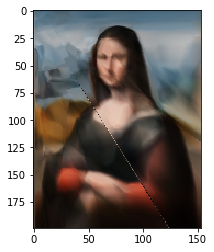

In [32]:
# use this cell to find the best model architecture

model.fit(X_train, Y_train, nb_epoch=1000, shuffle=True, verbose=1, batch_size=10)
Y = model.predict(X_train, batch_size=200)
k = 0
im_out = np.zeros((im.shape[0],im.shape[1],3))

for i in range(im.shape[0]):
    for j in range(im.shape[1]):
        im_out[i,j]= Y[k]
        k += 1
        
plt.imshow(im_out)
plt.show()